Plot a distribution of the S/N in the H$\alpha$ flux for all the galaxies used in the analysis of the second rotation curve paper (all the galaxies with valid map fits).

In [5]:
import numpy as np
import numpy.ma as ma

from astropy.table import Table

import matplotlib.pyplot as plt
%matplotlib notebook

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from DRP_rotation_curve import extract_data

In [4]:
MANGA_FOLDER = '/Users/kellydouglass/Documents/Research/data/SDSS/dr16/manga/spectro/'
VEL_MAP_FOLDER = MANGA_FOLDER + 'analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/'

# Data

Read in the final data table of galaxies, so that we know which ones we need to include in the distribution.

In [2]:
gal_filename = '../spirals/DRP-master_file_vflag_BB_smooth1p85_mapFit_N2O2_HIdr2_noWords_v5.txt'

data = Table.read(gal_filename, format='ascii.commented_header')

In [3]:
bad_boolean = np.logical_or.reduce([data['M90_map'] == -99, 
                                    data['M90_disk_map'] == -99, 
                                    data['alpha_map'] > 99, 
                                    data['ba_map'] > 0.998])

good_galaxies = data[~bad_boolean]

# S/N

For each galaxy that is included in the final sample, calculate the S/N in the H$\alpha$ flux for each spaxel and store those values in an array.

**Note:** We do not know how large this array is going to be ahead of time, but we do know that it is going to be LARGE!

In [32]:
SN_spaxels = []

frac_spaxels_lost = np.zeros(len(good_galaxies))

n_removed = 0

for i in range(len(good_galaxies)):
    
    ############################################################################
    # Read in Ha flux data
    #---------------------------------------------------------------------------
    plate = good_galaxies['MaNGA_plate'][i]
    IFU = good_galaxies['MaNGA_IFU'][i]
    gal_ID = str(plate) + '-' + str(IFU)
    
    _, _, _, _, _, Ha_flux, Ha_flux_ivar, Ha_flux_mask, _, _, _ = extract_data(VEL_MAP_FOLDER, gal_ID)
    ############################################################################
    
    
    ############################################################################
    # Mask arrays
    #---------------------------------------------------------------------------
    mHa_flux = ma.array(Ha_flux, mask=Ha_flux_mask)
    
    mHa_flux_ivar = ma.array(Ha_flux_ivar, mask=Ha_flux_mask)
    ############################################################################
    
    
    ############################################################################
    # Compute S/N map and store it in the main list
    #---------------------------------------------------------------------------
    SN_map = mHa_flux*ma.sqrt(mHa_flux_ivar)
    
    SN_spaxels.append(SN_map.compressed())
    ############################################################################
    
    
    ############################################################################
    # Determine if all of the spaxels have S/N < 5
    #---------------------------------------------------------------------------
    if ma.all(SN_map < 5):
        n_removed += 1
    ############################################################################
    
    
    ############################################################################
    # Determine the fraction of spaxels that have S/N < 5
    #---------------------------------------------------------------------------
    frac_spaxels_lost[i] = ma.sum(SN_map < 5)/len(SN_map.compressed())
    ############################################################################
    
        
SN_spaxels_all = np.concatenate(SN_spaxels, axis=0)

<IPython.core.display.Javascript object>


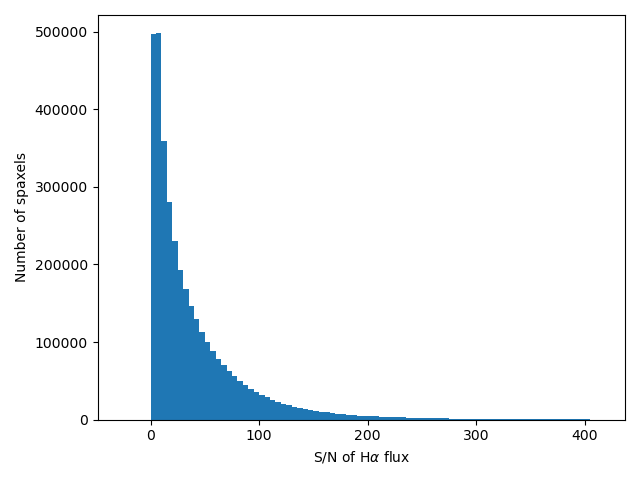

In [31]:
plt.figure()

n,_,_ = plt.hist(SN_spaxels_all, bins=np.arange(0,1000,5))

#plt.vlines(5, 0, 500000, colors='r', linestyles=':')

#plt.yscale('log')

#plt.xlim((0,600))
#plt.ylim((0,100))

plt.xlabel(r'S/N of H$\alpha$ flux')
plt.ylabel('Number of spaxels')

plt.tight_layout();

In [30]:
print('Fraction of spaxels that would be cut with S/N > 5:', n[0]/len(SN_spaxels_all))
print('Number of galaxies that would be lost:', n_removed)

Fraction of spaxels that would be cut with S/N > 5: 0.13827015284169436
Number of galaxies that would be lost: 0
